In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

In [4]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("/home/dietrich/Testing/DECA/DECA/TestSamples/Brenken_Rudolf/2016-12-06_00-00_Brenken-Rudolf_01/2016-12-06_001.JPG")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)



In [ ]:
print(len([face_blendshapes_category.score for face_blendshapes_category in detection_result.face_blendshapes[0]]))

plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

In [6]:
blendshapes_idx_left = [1, 4, 7, 9, 11, 13, 15, 17, 19, 21, 24, 28, 30, 33, 34, 36, 44, 46, 48, 50]
blendshapes_idx_left = [x - 1 for x in blendshapes_idx_left]
blendshapes_idx_rigt = [2, 5, 8, 10, 12, 14, 16, 18, 20, 22, 26, 29, 31, 35, 37, 29, 45, 47, 49, 51]
blendshapes_idx_rigt = [x - 1 for x in blendshapes_idx_rigt]
blendshapes_idx_both = [3, 6, 23, 25, 27, 32, 38, 40, 41, 42, 43, 52]
blendshapes_idx_both = [x - 1 for x in blendshapes_idx_both]



In [7]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mediapipe_helpers as mp_h

In [2]:
img_path = "/home/dietrich/Testing/DECA/DECA/TestSamples/Brenken_Rudolf/2017-02-13_00-00_Brenken-Rudolf_03/2017-01-13_003.JPG"

print(len(mp_h.get_face_landmarks(img_path)))

478


I0000 00:00:1707819704.258338 1418993 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1707819704.263650 1419035 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.0.4-0ubuntu1~22.04.1), renderer: Mesa Intel(R) HD Graphics 4600 (HSW GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Probanden

In [16]:
base_folder = "/home/dietrich/Testing/DECA/DECA/TestSamples/Probanden"

bs_list = mp_h.blendshapes_for_dataset(base_folder)

expressionnames = ["Neutral", "Augen zu", "Augen doll zu", "Stirn runzeln", "Nase rümpfen", "Lächeln", "Lächeln doll", "Mund spitzen", "Mundwinkel runter"]

I0000 00:00:1707824291.687939 1418993 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1707824291.689523 1499859 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.0.4-0ubuntu1~22.04.1), renderer: Mesa Intel(R) HD Graphics 4600 (HSW GT2)
W0000 00:00:1707824291.690860 1418993 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
I0000 00:00:1707824291.952771 1418993 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1707824291.953393 1499869 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.0.4-0ubuntu1~22.04.1), renderer: Mesa Intel(R) HD Graphics 4600 (HSW GT2)
W0000 00:00:1707824291.953764 1418993 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
I0000 00:00:1707824292.211237 1418993 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1707824292.212048 1499879 gl_context.cc:344] GL version: 3.2 

[[[5.43699169e-03 2.93879334e-05 1.66663651e-10 ... 2.10300492e-04
   3.99242885e-04 2.93699114e-09]
  [2.14943030e-04 3.51679352e-03 1.87454051e-10 ... 3.52677023e-05
   6.64136146e-04 6.96508483e-09]
  [2.64231747e-01 2.17296586e-05 1.26978852e-09 ... 5.74034238e-05
   4.30362157e-05 3.20669365e-08]
  ...
  [6.66813649e-02 4.47023334e-05 1.64805700e-06 ... 5.32805873e-01
   2.62985653e-02 4.26835434e-01]
  [2.90880056e-04 4.79228814e-03 1.28972161e-10 ... 3.55869796e-13
   7.25724545e-12 7.45872424e-14]
  [2.14449605e-04 1.90555613e-03 4.90711792e-11 ... 2.25477407e-10
   2.12681375e-09 7.96386503e-13]]

 [[3.36170607e-04 2.39471843e-03 1.38034748e-10 ... 7.85526240e-07
   9.27700824e-05 1.00082054e-08]
  [2.43256495e-06 3.46597372e-03 8.98530938e-10 ... 2.06917991e-05
   2.97627989e-05 1.43787894e-07]
  [1.78616400e-01 3.05848448e-05 4.83149518e-09 ... 3.81720808e-01
   1.74214742e-04 5.30371808e-06]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000

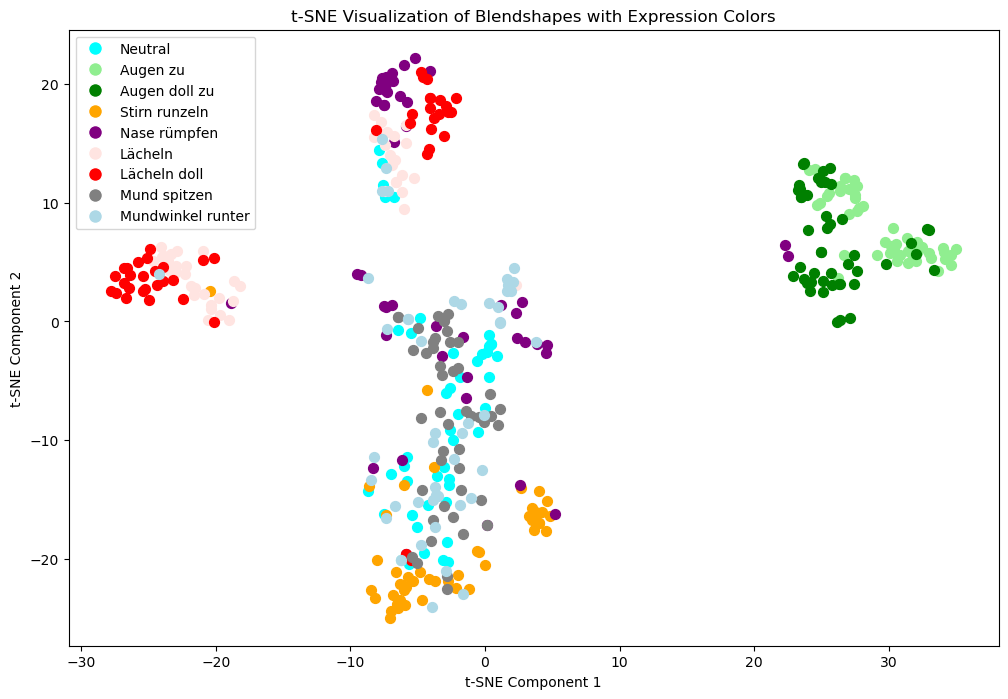

In [26]:
bs_list_rigt = bs_list[:,:, blendshapes_idx_rigt]
bs_list_left = bs_list[:,:, blendshapes_idx_left]

bs_list_side = (bs_list_rigt - bs_list_left)**2

print(bs_list_side)

print(bs_list_side.shape)
mp_h.show_tSNE(bs_list_side,expressionnames, position="upper left")